## Sentiment Analysis

We will build a machine learning model that predicts the sentiment of a movie review. Sentiment analysis is an NLP technique used to determine whether data is positive, negative, or neutral. It’s really helpful for businesses because it helps understand the overall opinions of their customers.

For this project, we will use an IMDB dataset that contains 50k movie reviews. with 2 columns (review and sentiment). The goal is to build the best machine learning model that predicts the sentiment given a movie review. We only have to predict whether a movie review is positive or negative. This is known as binary text classification because there are only two possible outcome

Get the data set from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/) and upload it to your notebook

Stuff for plotting and visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

### Preparing the Data

#### Reading the Dataset

We’ll read the file using the Pandas library.

In [17]:
import pandas as pd
df_review = pd.read_csv('IMDB.csv', engine ='python')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [18]:
print(df_review.columns)

Index(['review', 'sentiment'], dtype='object')


This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced

In [20]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]

df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive, df_negative])

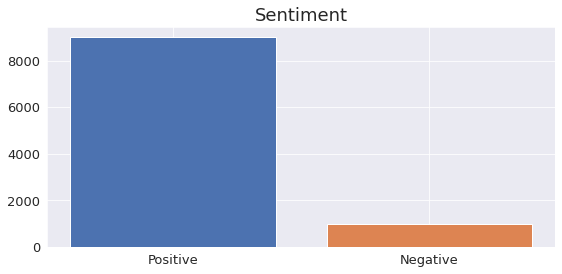

In [29]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [24]:
df_review_imb.size

20000

#### Dealing with Imbalanced Classes


To resample our data we use the imblearn library. We can either undersample positive reviews or oversample negative reviews

In [21]:
from imblearn.under_sampling import RandomUnderSampler     # import a random under sampler

rus = RandomUnderSampler(random_state=0)

df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_imb[['review']], df_review_imb['sentiment'])     # undersample 


df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [23]:
df_review_bal.size

4000

First, we create a new instance of ```RandomUnderSampler``` (rus), we add ```random_state=0``` just to control the randomization of the algorithm. Then we resample the imbalanced dataset ```df_review_imb```  by fitting rus with ```rus.fit_resample(x, y)``` where “x” contains the data which have to be sampled and “y” corresponds to labels for each sample in “x”.
After this, x and y are balanced and we’ll store it in a new dataset named ```df_review_bal```.






In [22]:
## compare the data

print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))


sentiment
positive    9000
negative    1000
dtype: int64
sentiment
positive    1000
negative    1000
dtype: int64


If you get an error while using the ```Random Under sampler```, 
try the code below


```
length_negative = len(df_review_imb[df_review_imb['sentiment']=='negative'])
df_review_positive = df_review_imb[df_review_imb['sentiment']=='positive'].sample(n=length_negative)
df_review_non_positive = df_review_imb[~(df_review_imb['sentiment']=='positive')]

df_review_bal = pd.concat([df_review_positive, df_review_non_positive])
df_review_bal.reset_index(drop=True, inplace=True)
df_review_bal['sentiment'].value_counts()
```





### Splitting data into train and test set

The ```train```  dataset will be used to fit the model , while the ```test``` dataset will be used to provide an unbiased evaluation of a final model fit on the training dataset.

We will use sklearn's ```train_test_split``` to do the job.



In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size= 0.33, random_state = 135)



*   **train_x**: Independent variables (review) that will be used to train the model. Since we specified test_size $= 0.33, 67\%$ of observations from the data will be used to fit the model.
*  **train_y**: Dependent variables (sentiment) or target label that need to be predicted by this model.
 

* **test_x**: The remaining 33% of independent variables that will be used to make predictions to test the accuracy of the model.
*  **test_y**: Category labels that will be used to test the accuracy between actual and predicted categories.





In [27]:
# set the dependent and the independent variables within our train and test set

train_x ,train_y = train['review'], train['sentiment']

test_x, test_y = test['review'], test['sentiment']

In [30]:
train_y.value_counts()

negative    670
positive    670
Name: sentiment, dtype: int64

### Text Representation ( Bag Of Words)

The classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. We need to convert the text to a more manageable representation. There are many text representation techniques such as one-hot encoding, bag of words, and wor2vec.
For this, we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)


#### Count Vectorizer

The CountVectorizer gives us the frequency of occurrence of words in a document. 

#### Term Frequency, Inverse Document Frequency (TF-IDF)

The TF-IDF computes “weights” that represents how important a word is to a document in a collection of documents (aka corpus). The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word.

### Turning our text data into numerical vectors

We want to identify unique words for the positive and negative reviews, we will chose the TF-IDF model.

we create a new instance of TfidfVectorizer(tfidf), we removed English stopwords and then fit (finds the internal parameters of a model) and transform (applies the parameters to the data) the train_x (text reviews)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<1340x20312 sparse matrix of type '<class 'numpy.float64'>'
	with 117669 stored elements in Compressed Sparse Row format>

If you want to dispay this matrix,use the code below. But there will be a lot of $0$ values, since its a sparse matrix where the matrix is a $1340 \times 20312$ in dimension ,and only $117669$ elements are different from $0$.

In [32]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,007,01,01pm,02,04,06,10,100,1000,100m,101,104,1040,1040a,108,109,11,110,11th,12,120,127,12th,13,130,1300s,133,13th,14,1473,14th,15,150,150th,158,16,161,166,...,zentropa,zepher,zephyr,zeppelin,zero,zeros,zeus,zhaan,zhang,zheng,zhu,ziegler,zillionaire,ziman,zinc,zineb,zingers,ziyi,zizek,zodiac,zoe,zoey,zola,zombi,zombie,zombies,zombiez,zone,zoned,zoo,zoom,zooming,zooms,zoot,zues,zzzzzzzzzzzzzzzzzz,élan,ísnt,île,ünfaithful
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091538,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181981,0.0,0.0,0.0,0.0
1243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [33]:
test_x_vector = tfidf.transform(test_x)

 We could better prepare the text data in order to develop better models by using tokenization and removing extra words we consider irrelevant apart from the stopword list CountVectorizer and Tfidf have by default. 

### Model Selection
Now, we have the data, we can experiment varioous machine learning models and evaluate their accuracy.


#### Support Vector Machine (SVM)
To fit an SVM model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)


In [34]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

After fitting svc we can predict whether a review is positive or negative with the .predict() method.

In [38]:
print(svc.predict(tfidf.transform(['How this film could be classified as Drama, I have no idea. If I were John Voight and Mary Steenburgen, I would be trying to erase this from my CV. It was as historically accurate as Xena and Hercules. Abraham and Moses got melded into Noah. Lot, Abrahams nephew, Lot, turns up thousands of years before he would have been born. Canaanites wandered the earth...really? What were the scriptwriters thinking? Was it just ignorance I remember something about Noah and animals, and Lot and Canaanites and all that stuff from Sunday School or were they trying to offend the maximum number of people on the planet as possible- from Christians, Jews and Muslims, to historians, archaeologists, geologists, psychologists, linguists ...as a matter of fact, did anyone not get offended? Anyone who had even a modicum of taste would have winced at this one!'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


In [36]:
print(svc.predict(tfidf.transform(['One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked'])))

['negative']


In [37]:
print(svc.predict(tfidf.transform(['I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didnt care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that point. Since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. There are no rules.'])))

['negative']


#### Decision Tree
 To fit a decision tree model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [40]:
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))

['positive']


In [42]:
print(dec_tree.predict(tfidf.transform(['One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked'])))

['positive']


#### Naive Bayes
To fit a Naive Bayes model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

#### Logistic Regression
To fit a Logistic Regression model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

### Accuracy Detection

In [51]:
svc.score(test_x_vector, test_y)
# support vector machine score

0.843939393939394

In [52]:
dec_tree.score(test_x_vector, test_y)
# decision tree score

0.6727272727272727

In [53]:
gnb.score(test_x_vector.toarray(), test_y)
# naive bayes score

0.6287878787878788

In [54]:
log_reg.score(test_x_vector, test_y)

# log regression score

0.8348484848484848

SVM and Logistic Regression perform better than the other two classifiers, with SVM having a slight advantage (84% of accuracy).

### F1 Score

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.
F1 score is calculated with the following formula 





```
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
F1 score reaches its best value at 1 and worst score at 0.
```


To obtain the F1 score, we need the true labels and predicted labels
```f1_score(y_true, y_pred)```

In [55]:
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84919473, 0.83830455])

The scores obtained for positive labels is 0.84, while negative labels is 0.83.

### Classification Report

We can also build a text report showing the main classification metrics that include those calculated before. To obtain the classification report, we need the true labels and predicted labels classification_report(y_true, y_pred)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.82      0.88      0.85       330
    negative       0.87      0.81      0.84       330

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.85      0.84      0.84       660



#### Confusion Matrix
A confusion matrix) is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives (check the graph in this link in case you don’t understand these terms)
To obtain the confusion matrix, we need the true labels and predicted labels.

In [57]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])

In [58]:
print(conf_mat)

[[290  40]
 [ 63 267]]


### Tuning the Model


#### Grid Search CV

This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters. To do so, we write the following code.

In [62]:
from sklearn.model_selection import GridSearchCV
#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

As you can see the code it’s not so different from the one we wrote to fit the SVM model; however, now we specified some parameters to obtain the optimum model.
After fitting the model, we obtain the best score, parameters, and estimators with the following code.

In [63]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)
